#Introduction

**Problem Statement:**

Many of you may remember watching Pokémon during your childhood, so we've created an exciting challenge for you! You'll analyze data and build a machine learning model to predict the rarity of a given Pokémon. The target rarity includes four unique classes: Standard, Legendary, Mythic, and Ultra Beast.

- **Standard Pokémon:** These are the most common Pokémon found in the game. They can be caught in various environments and are typically easier to obtain. Standard Pokémon are often the backbone of trainers' teams and can evolve into more powerful forms.

- **Legendary Pokémon:** These are rare and powerful Pokémon that are often tied to special in-game events or raids. They usually have higher base stats and unique abilities compared to Standard Pokémon. Legendary Pokémon are not typically available in the wild and often require specific conditions or events to be caught.

- **Mythic Pokémon:** Mythic Pokémon are even rarer than Legendary Pokémon and are often tied to specific storylines or special quests. They are usually available for a limited time and often have unique traits or abilities. Mythic Pokémon typically cannot be caught in standard gameplay and are obtained through special research tasks.

- **Ultra Beasts:** These are a special category of Pokémon introduced in later generations. Ultra Beasts have unique designs and lore, often originating from other dimensions. They tend to have high stats and unique abilities, making them formidable in battles. Ultra Beasts can be encountered in specific events or challenges and usually have special requirements for capture.






<center><img src="https://storage.googleapis.com/kaggle-datasets-images/5494631/9104107/014a281ff7b3277881bfdbb70238860b/dataset-cover.jpg?t=2024-08-04-16-12-14" width = 410 height = 300 /></center>

........................................................................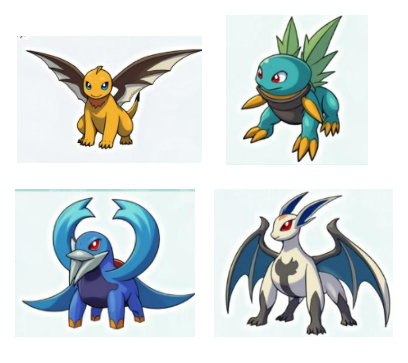......................................................................

Our goal is to determine the rarity of a Pokémon based on its features. Each of these categories adds depth to the game, offering players different challenges and opportunities for team-building and strategy


The dataset contains detailed information on 1007 Pokémon from the popular mobile game Pokémon GO. It includes a wide range of attributes such as base stats, move sets, rarity, and acquisition methods.

The data is downloded from kaggle please refer to this <a href='https://www.kaggle.com/datasets/shreyasur965/pokemon-go'>link</a> for more details about the data.



# STEP 1: Import the necessary Libraries

In [183]:
# Core libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Data visualization libraries
import matplotlib.pyplot as plt  # For creating attractive visualizations
import seaborn as sns  # For plotting graphs and charts

# Machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation metrics
from sklearn.metrics import f1_score, precision_score, recall_score  # For additional classification metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling (standardization)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For ensemble classification algorithms

# Imbalanced data handling
from imblearn.over_sampling import SMOTE  # For handling class imbalance using Synthetic Minority Over-sampling Technique

# Warning management
import warnings
warnings.filterwarnings("ignore")

# STEP 2: Loading the Data

**Dataset Information:**

The data was collected using the RapidAPI Pokémon GO API, offering researchers and data enthusiasts a rich resource for analysis, machine learning projects, and game strategy development.

Key features of this dataset include:

- Comprehensive coverage of 1007 Pokémon
- 24 attributes for each Pokémon, including battle stats, type, and rarity
- Information on acquisition methods (wild, egg, raid, etc.)
- Move set details for both fast and charged moves
- Game mechanics data such as capture and flee rates

### 2.1 Load the dataset, set columns to display 30, and view it
* Identify the type of values (numerical, categorical, or any format) present in the columns.

In [184]:
# Load the dataset
# Reading the 'pokemon.csv' file into a DataFrame
df = pd.read_csv('resources/pokemon.csv')

# Set pandas display option to show 30 columns
pd.set_option('display.max_columns', 30)

# Display the first 5 rows of the dataset
df.head()
 # Show the first few entries to get an overview of the data

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,3,1275,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,3,1943,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,3,3112,0.2,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,3,1121,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,3,1891,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


### 2.2 Check the unique values in the `rarity` column

Text(0.5, 1.0, 'Distribution of Rarity in Pokemon Dataset')

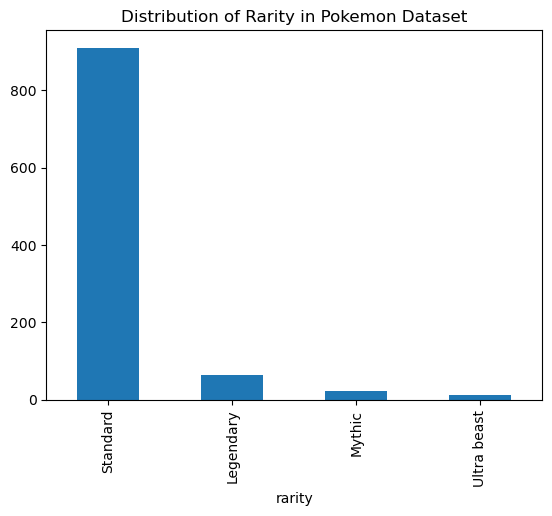

In [185]:
# Find unique values in the 'rarity' column
df['rarity'].value_counts().plot(kind='bar')
plt.title('Distribution of Rarity in Pokemon Dataset')

### 2.3 View the columns of the data and understand them

In [186]:
# Display all column names in the DataFrame
df.columns

Index(['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense',
       'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves',
       'candy_required', 'distance', 'max_cp', 'attack_probability',
       'base_capture_rate', 'base_flee_rate', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

### 2.4 Check the shape of the dataset

In [187]:
# Get the shape of the DataFrame
df.shape

(1007, 24)


### 2.5 Understand the datatypes of each of the columns

In [188]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                471 non-null    float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            904 non-null    float64
 13  bas

### 2.6 Generate Descriptive Statistics and closely examine the results to assess the skewness of the values in the columns

In [189]:
# Generate descriptive statistics for numeric columns
df.describe()

,pokemon_id,base_attack,base_defense,base_stamina,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency
count,1007.000000,1007.000000,1007.000000,1007.000000,471.000000,1007.000000,1007.000000,904.000000,904.0,904.0,904.000000,904.000000,904.000000
mean,504.105263,166.268123,143.824230,171.078451,65.995754,5.058590,2309.782522,0.140951,-1.0,-1.0,0.159093,1.600996,0.204701
std,291.003489,59.382689,52.023124,47.956251,61.598321,5.458459,1118.813651,0.090397,0.0,0.0,0.062609,0.029934,0.058141
min,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,16.000000,0.000000,-1.0,-1.0,0.000000,1.600000,0.200000
25%,252.500000,119.000000,103.000000,137.000000,25.000000,3.000000,1306.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
50%,504.000000,165.000000,142.000000,167.000000,50.000000,3.000000,2304.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
75%,755.500000,211.000000,179.000000,193.000000,100.000000,5.000000,3138.000000,0.200000,-1.0,-1.0,0.150000,1.600000,0.200000
max,1008.000000,414.000000,505.000000,496.000000,400.000000,20.000000,9366.000000,0.700000,-1.0,-1.0,1.000000,2.500000,1.100000


### 2.7 Generate Descriptive Statistics for categorical columns and closely examine the results

In [190]:
# Generate descriptive statistics for categorical columns
df.describe(include=['object'])

,pokemon_name,type,rarity,charged_moves,fast_moves,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
count,1007,1007,1007,1007,1007,744,744,744,744,744,744
unique,1007,206,4,894,691,2,2,2,2,2,2
top,Bulbasaur,['Water'],Standard,['Struggle'],['Splash'],False,False,True,True,True,True
freq,1,73,910,36,17,685,379,737,741,455,738


### 2.8 Check the Null values
* Calculate the count of null values for each column in the DataFrame.
* Determine the percentage of null values in each column relative to the total number of rows.
* Create a new DataFrame that summarizes both the count and percentage of null values.
* Filter the summary DataFrame to only display columns that contain null values.
* Print the resulting summary DataFrame.

In [191]:
# Calculate the count of null (NaN) values in each column of the DataFrame 'df'
null_counts = df.isnull().sum()


# Calculate the percentage of null values for each column
# This is done by dividing the null counts by the total number of rows in 'df' (len(df))
# and multiplying by 100 to convert it to a percentage
null_percentages = (null_counts / len(df)) * 100


# Creating a new DataFrame to hold null counts and percentages
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Filtering to only show columns with null values
null_summary = null_summary[null_summary['Null Count'] > 0]


# Displaying the null summary DataFrame
null_summary

,Null Count,Null Percentage
candy_required,536,53.227408
attack_probability,103,10.228401
base_capture_rate,103,10.228401
base_flee_rate,103,10.228401
dodge_probability,103,10.228401
max_pokemon_action_frequency,103,10.228401
min_pokemon_action_frequency,103,10.228401
found_egg,263,26.117180
found_evolution,263,26.117180
found_wild,263,26.117180


### 2.9 Drop the `candy_required` column from original df

In [192]:
# Drop the 'candy_required' from the original dataframe df
df.drop(columns=['candy_required'], inplace=True)

### 2.10 Drop the `candy_required` index from null_summary

In [193]:
# Drop the 'candy_required' from the index of null summary
null_summary.drop(index=['candy_required'], inplace=True)

### 2.11 Print the null_summary dataframe

In [194]:
# Displaying the null summary DataFrame
null_summary

,Null Count,Null Percentage
attack_probability,103,10.228401
base_capture_rate,103,10.228401
base_flee_rate,103,10.228401
dodge_probability,103,10.228401
max_pokemon_action_frequency,103,10.228401
min_pokemon_action_frequency,103,10.228401
found_egg,263,26.117180
found_evolution,263,26.117180
found_wild,263,26.117180
found_research,263,26.117180


### 2.12 Fill na values


2.12.1 Slice the required column names from the null_summary

In [195]:
# Define indices for numerical and boolean columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
boolean_cols = df.select_dtypes(include=['object']).columns.tolist()

2.12.2 Run a loop to impute the mean values to the numerical columns in the original dataframe(df)

In [196]:
# Impute mean for numerical columns
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

2.12.3 Run a loop to impute the mode values to the categorical columns in the original dataframe(df)

In [197]:
# Impute default value for boolean columns
for col in boolean_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

2.12.4 Check the null values in df(original dataframe) after imputation

In [198]:
# Check the null values in the original df using isna()
df.isnull().sum()

pokemon_id                      0
pokemon_name                    0
base_attack                     0
base_defense                    0
base_stamina                    0
type                            0
rarity                          0
charged_moves                   0
fast_moves                      0
distance                        0
max_cp                          0
attack_probability              0
base_capture_rate               0
base_flee_rate                  0
dodge_probability               0
max_pokemon_action_frequency    0
min_pokemon_action_frequency    0
found_egg                       0
found_evolution                 0
found_wild                      0
found_research                  0
found_raid                      0
found_photobomb                 0
dtype: int64

### 2.13 Find unique value count for each feature

In [199]:
# Get the count of unique values in each column of the DataFrame
df.nunique()

pokemon_id                      1007
pokemon_name                    1007
base_attack                      244
base_defense                     210
base_stamina                     117
type                             206
rarity                             4
charged_moves                    894
fast_moves                       691
distance                           4
max_cp                           845
attack_probability                17
base_capture_rate                  1
base_flee_rate                     1
dodge_probability                 13
max_pokemon_action_frequency       3
min_pokemon_action_frequency       5
found_egg                          2
found_evolution                    2
found_wild                         2
found_research                     2
found_raid                         2
found_photobomb                    2
dtype: int64

### 2.14 Drop features with only 1 unique value

In [200]:
# Drop column with only 1 unique value as it adds no value during model training
df.drop(columns=['base_capture_rate', 'base_flee_rate'], inplace=True)

### 2.15 Drop features which all values unique

In [201]:
# Drop column with all values unique because the only act as identifier of records
df.drop(columns=['pokemon_id', 'pokemon_name'], inplace=True)

### 2.16 Dropping `charged_moves` and `fast_moves` because of there high cardinality.

In [202]:
#Drop column with high cardinal categorical columns as the data size is not
#that huge such columns will be difficult to learn

df.drop(columns=['charged_moves', 'fast_moves'], inplace=True)


## STEP 3: Exploratory Data Analysis(EDA)

In [203]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['base_attack', 'base_defense', 'base_stamina', 'distance', 'max_cp', 'attack_probability', 'dodge_probability', 'max_pokemon_action_frequency', 'min_pokemon_action_frequency']
Categorical Columns: ['type', 'rarity']


### 3.1 Check the distribution of the target variable - `rarity`.

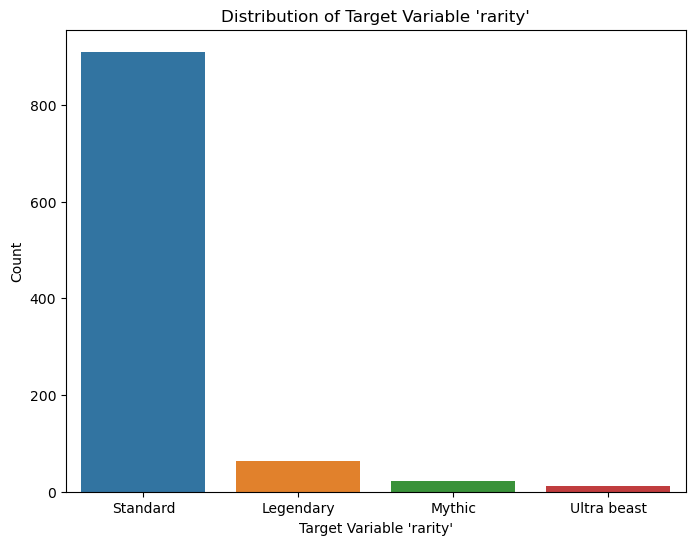

In [204]:
# Check the distribution of the target variable 'rarity'
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Create a count plot for the 'y' variable in the dataset
sns.countplot(x='rarity', data=df)

# Add a title to the plot
plt.title("Distribution of Target Variable 'rarity'")

# Label the x-axis
plt.xlabel("Target Variable 'rarity'")

# Label the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()


# STEP 4: Feature Engineering

### 4.1 Perform correlation analysis of the data

In [205]:
# Encode the 'rarity' column using label encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'rarity' column
df['rarity'] = label_encoder.fit_transform(df['rarity'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   base_attack                   1007 non-null   int64  
 1   base_defense                  1007 non-null   int64  
 2   base_stamina                  1007 non-null   int64  
 3   type                          1007 non-null   object 
 4   rarity                        1007 non-null   int32  
 5   distance                      1007 non-null   int64  
 6   max_cp                        1007 non-null   int64  
 7   attack_probability            1007 non-null   float64
 8   dodge_probability             1007 non-null   float64
 9   max_pokemon_action_frequency  1007 non-null   float64
 10  min_pokemon_action_frequency  1007 non-null   float64
 11  found_egg                     1007 non-null   bool   
 12  found_evolution               1007 non-null   bool   
 13  fou

In [206]:
df['rarity'].value_counts()

rarity
2    910
0     64
1     22
3     11
Name: count, dtype: int64

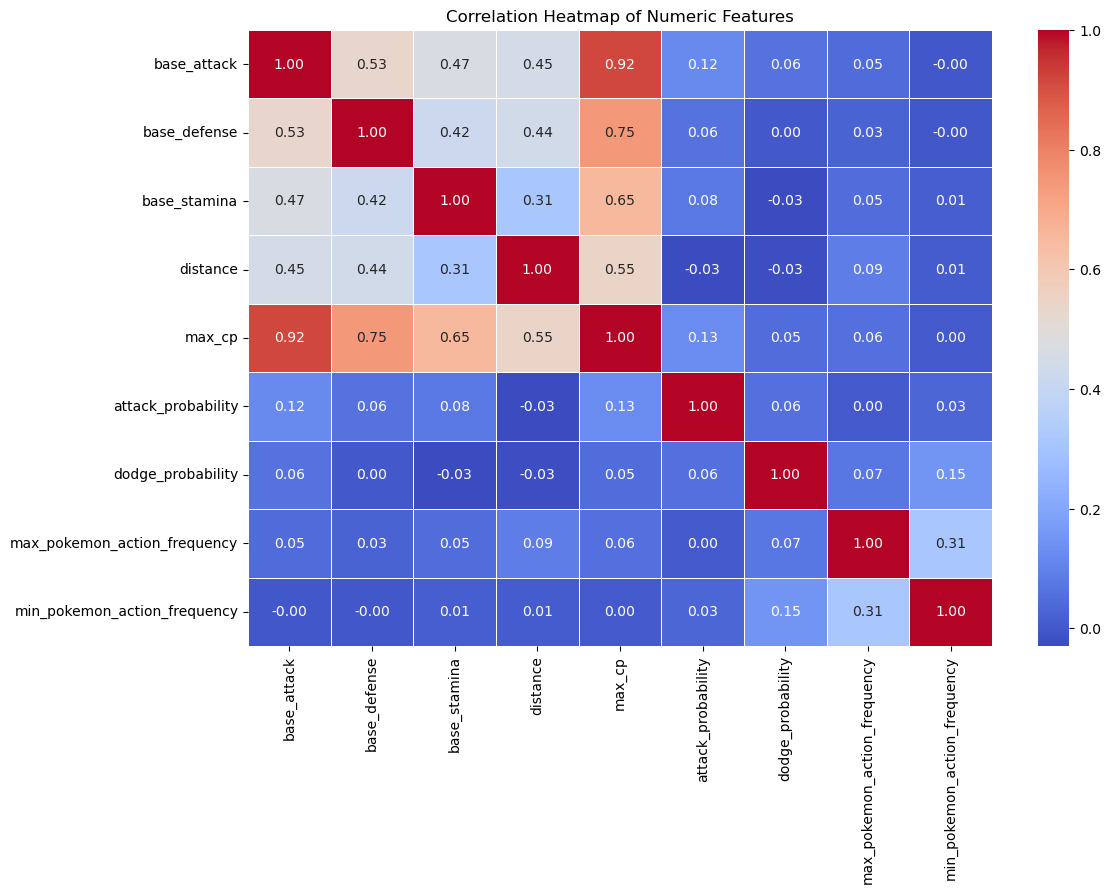

In [207]:
# Get the numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix of the numeric features in the dataset
# The 'annot=True' parameter adds the correlation values directly on the heatmap
# 'cmap='coolwarm'' applies a color map to distinguish positive and negative correlations clearly
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title("Correlation Heatmap of Numeric Features")

# Display the heatmap
plt.show()


### 4.2: Combining and removing features with high correlation

- **Base Attack:** The base attack stat of the Pokémon, which determines its offensive capabilities in battles.
- **Base Defense:** The base defense stat of the Pokémon, which indicates how well it can withstand attacks from opponents.
- **Base Stamina:** The base stamina (HP) stat of the Pokémon, representing its overall health and endurance during battles.
- **Max CP:** The maximum Combat Power (CP) that the Pokémon can achieve, indicating its potential strength in battles.

Sum the base attack, base defense, and base stamina to create a total stats feature, giving a quick overview of a Pokémon's overall potential.

The ratio of Total Stats to Max CP can provide insights into the overall effectiveness and balance of a Pokémon in battles.

4.2.1 Pre-processing columns
* Sum the values of the `base_attack`, `base_defense`, and `base_stamina` columns to create a new feature called `total_stats`. This will give a quick overview of a Pokémon's overall potential.

* Using the `total_stats` feature, calculate the ratio of `total_stats` to `max_cp` for each Pokémon. What insights does this ratio provide about a Pokémon's effectiveness and balance in battles?

In [208]:
# Calculate the total stats of the Pokémon by summing base attack, defense, and stamina
  # Total stats feature
df['total_stats'] = df['base_attack'] + df['base_defense'] + df['base_stamina']

# Calculate CP efficiency by dividing total stats by maximum Combat Power (CP)
  # CP efficiency feature
df['cp_efficiency'] = df['total_stats'] / df['max_cp']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   base_attack                   1007 non-null   int64  
 1   base_defense                  1007 non-null   int64  
 2   base_stamina                  1007 non-null   int64  
 3   type                          1007 non-null   object 
 4   rarity                        1007 non-null   int32  
 5   distance                      1007 non-null   int64  
 6   max_cp                        1007 non-null   int64  
 7   attack_probability            1007 non-null   float64
 8   dodge_probability             1007 non-null   float64
 9   max_pokemon_action_frequency  1007 non-null   float64
 10  min_pokemon_action_frequency  1007 non-null   float64
 11  found_egg                     1007 non-null   bool   
 12  found_evolution               1007 non-null   bool   
 13  fou

4.2.2 Drop Redundant Columns

* Drop the columns `base_attack`, `base_defense`, `base_stamina`, `max_cp`, and `total_stats`.

* Since we have already created a comprehensive feature (`total_stats`) that sums up the attack, defense, and stamina, and calculated the ratio to max_cp, these individual columns are now redundant. Dropping them simplifies the dataset and prevents redundancy in model training, ensuring the model focuses on more meaningful and non-correlated features.

In [209]:
# Drop base_attack, base_defense, base_stamina, max_cp, and total_stats.
df.drop(columns=['base_attack', 'base_defense', 'base_stamina', 'max_cp', 'total_stats'], inplace=True)

4.2.3 Drop `found_wild`, `found_research` columns
* For the features `found_photobomb`, `found_wild`, and `found_research`, we will retain only one of them and remove the others due to their high correlation, with correlation values approaching 1. This will help reduce redundancy in our dataset and improve the model's efficiency.

In [210]:
# Drop found_wild, found_research columns
df.drop(columns=['found_wild', 'found_research'], inplace=True)

### 4.3 Perform One-hot encoding on `type` feature

In Pokémon GO, Pokémon types play a crucial role in battles, influencing effectiveness against other types and overall strategy. Here are the main types of Pokémon in the game:

- **Normal:** Generally versatile but has no specific strengths or weaknesses.
- **Fire:** Strong against Grass, Bug, Ice, and Steel; weak to Water, Rock, and Ground.
- **Water:** Strong against Fire, Ground, and Rock; weak to Electric and Grass.
- **Grass:** Strong against Water, Ground, and Rock; weak to Fire, Ice, Poison, Flying, and Bug.
- **Electric:** Strong against Water and Flying; weak to Ground.
- **Ice:** Strong against Grass, Ground, Flying, and Dragon; weak to Fire, Fighting, Rock, and Steel.
- **Fighting:** Strong against Normal, Ice, Rock, Dark, and Steel; weak to Flying, Psychic, and Fairy.
- **Poison:** Strong against Grass and Fairy; weak to Ground and Psychic.
- **Ground:** Strong against Fire, Electric, Poison, Rock, and Steel; weak to Water, Grass, and Ice.
- **Flying:** Strong against Grass, Fighting, and Bug; weak to Electric, Rock, and Ice.
- **Psychic:** Strong against Fighting and Poison; weak to Bug, Ghost, and Dark.
- **Bug:** Strong against Grass, Psychic, and Dark; weak to Fire, Flying, Rock, and Fairy.
- **Rock:** Strong against Fire, Ice, Flying, and Bug; weak to Water, Grass, Fighting, Ground, Steel, and Fairy.
- **Ghost:** Strong against Psychic and Ghost; weak to Dark.
- **Dragon:** Strong against Dragon; weak to Ice, Fairy, and Dragon.
- **Dark:** Strong against Psychic and Ghost; weak to Fighting, Bug, and Fairy.
- **Steel:** Strong against Ice, Rock, and Fairy; weak to Fire, Fighting, and Ground.
- **Fairy:** Strong against Fighting, Dragon, and Dark; weak to Poison and Steel.

Each type interacts with others in a rock-paper-scissors manner, making type matchups crucial for battle strategy in Pokémon GO. This feature is also important for predicting rarity, as certain combinations of types can be common, while others may be rare and powerful.

4.3.1 Check `type` column

In [211]:
# Display the first few entries of the 'type' column
df['type'].head()

0    ['Grass', 'Poison']
1    ['Grass', 'Poison']
2    ['Grass', 'Poison']
3               ['Fire']
4               ['Fire']
Name: type, dtype: object

Note: Run the below cell to create a function which splits the list values.

In [212]:
# Function to split the items in the list
def process_type_column(value):
    """
    Process a string representing Pokémon types into a list.

    This function removes unwanted characters (single quotes, brackets)
    from the input string and splits it by commas to create a list
    of individual types.

    Parameters:
    value (str): A string containing Pokémon types.

    Returns:
    list: A list of Pokémon types as strings.
    """
    # Remove single quotes from the string
    value = value.replace("'", "")

    # Remove opening and closing brackets
    value = value.replace("[", "")
    value = value.replace("]", "")

    # Split the cleaned string by commas into a list
    value = value.split(',')

    return value  # Return the list of types

Note: Run the below cell to create a unique types dictonary.

In [213]:
# Define a set of unique Pokémon types
unique_types = [
    'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
    'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
    'Psychic', 'Rock', 'Steel', 'Water'
]

# Create a dictionary with each unique type as a key,
# and initialize its value as a list of zeros with the length of the DataFrame
unique_types_dict = {ky: [0] * df.shape[0] for ky in unique_types}  # This prepares a structure to track the presence of each type for every Pokémon in the DataFrame

4.3.2 Encode `Type` into Binary Features

* Iterate over the `type` column in the DataFrame, process the list format values using the `process_type_column` function, and then update the `unique_types_dict` with binary indicators for each unique  `type`.

Instructions:
* Use the provided `process_type_column` function to split the list of types in the type column into individual type values.
* For each type, set the corresponding entry in `unique_types_dict` to 1, indicating the presence of that type for the current .
* This step will help convert the list of types into a binary feature matrix, allowing the types to be used in the model for training.

In [214]:
# Iterate over the index and value of each entry in the 'type' column of the DataFrame
for idx, val in df['type'].items():

    # Process the string to get a list of individual types
    types = process_type_column(val)

    # Iterate over each type in the list
    for t in types:
        # Remove any leading or trailing whitespace from the type
        t = t.strip()

        # Set the corresponding entry in the unique_types_dict to 1,
        # indicating the presence of this type for the current Pokémon
        if t in unique_types_dict:
            unique_types_dict[t][idx] = 1


4.3.3 Create a Dataframe(df_type)

In [215]:
# Create a DataFrame from the unique_types_dict
type_df = pd.DataFrame(unique_types_dict)

4.3.4 Check the values of df_type

In [216]:
# Display the first 5 rows of df_type
type_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [217]:
# type_df value counts
type_df['Electric'].value_counts()

Electric
0    938
1     69
Name: count, dtype: int64

4.3.5 Concatenate the df_type with original dataframe(df)

In [218]:
# Concatenate the original DataFrame (df) with the new type DataFrame (df_type) along the columns
df = pd.concat([df, type_df], axis=1)

Since we have separately encoded the values from the `type` column into binary features, it is now necessary to drop the original `type` column from the DataFrame.


4.3.6 Drop the `type` column

In [219]:
# Drop the 'type' column from the DataFrame as it is now represented by the new binary columns
df.drop(columns=['type'], inplace=True)

4.3.7 Check the original dataset

In [220]:
# Get the first 5 rows of df
df.head()

,rarity,distance,attack_probability,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_raid,found_photobomb,cp_efficiency,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,2,3,0.1,0.15,1.6,0.2,True,False,True,True,0.280000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,3,0.1,0.15,1.6,0.2,False,True,True,True,0.231086,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2,3,0.2,0.15,1.6,0.2,False,True,True,True,0.185411,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,2,3,0.1,0.15,1.6,0.2,True,False,True,True,0.291704,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2,3,0.1,0.15,1.6,0.2,False,True,True,True,0.230037,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### 4.4 Encode target column(`rarity`) to numeric

In [221]:
# Import the LabelEncoder class for encoding categorical labels
# ALREADY IMPORTED ABOVE
# Initialize the LabelEncoder
# ALREADY DONE ABOVE

# Transform the 'rarity' column into numerical format using label encoding
  # Each unique rarity class is assigned a numerical value, making it suitable for model training

In [222]:
# 4.4.1 Split into train and test sets before applying SMOTE.
X = df.drop(columns=['rarity'])  # Features (all columns except 'rarity')
y = df['rarity']  # Target variable ('rarity' column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.5 Balance Data using SMOTE

In [223]:
# SMOTE should only be applied to the training data to prevent data leakage.

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)  # Initialize SMOTE with a random state for reproducibility
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE to the training data


### 4.6 Check the Distribution of the Target Variable
* Use the .value_counts() method for the target variable '`rarity`'

In [224]:
# Check the value_counts in y
y_resampled.value_counts()

rarity
2    727
0    727
1    727
3    727
Name: count, dtype: int64

# STEP 5: Model Building

### 5.1 Split the data into train and test

In [225]:
# Splitting the dataset into training and testing sets
# Already done before applying SMOTE

### 5.2 Build a Random Forest Classifier on the data

In [226]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the Accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)


Accuracy: 0.9455445544554455
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67        13
           1       0.25      0.25      0.25         4
           2       0.99      0.98      0.99       183
           3       0.00      0.00      0.00         2

    accuracy                           0.95       202
   macro avg       0.46      0.50      0.48       202
weighted avg       0.94      0.95      0.94       202



### 5.3 Build a Random Forest Classifier on the data

In [227]:
# Create a Gradient Boosting Classifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the Accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)



Accuracy: 0.9603960396039604
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.25      0.25      0.25         4
           2       0.99      0.99      0.99       183
           3       1.00      0.50      0.67         2

    accuracy                           0.96       202
   macro avg       0.74      0.65      0.67       202
weighted avg       0.96      0.96      0.96       202



In [228]:
# Use XGBoost Classifier
import xgboost as xgb

# Ensure no duplicate feature names remain in training/test sets.
# Preserve the first occurrence of any duplicated column name.
def _dedupe_df_cols(df):
	seen = set()
	cols = []
	for c in df.columns:
		if c not in seen:
			cols.append(c)
			seen.add(c)
	return df.loc[:, cols]

# Deduplicate columns in X_train and X_test (in-place reassignment)
X_train = _dedupe_df_cols(X_resampled)
X_test = _dedupe_df_cols(X_test)

# Align X_test columns to X_train (add any missing cols with 0, drop extras)
X_test = X_test.reindex(columns=X_resampled.columns, fill_value=0)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the Accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)


Accuracy: 0.9603960396039604
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         4
           2       1.00      0.98      0.99       183
           3       0.50      0.50      0.50         2

    accuracy                           0.96       202
   macro avg       0.54      0.62      0.57       202
weighted avg       0.95      0.96      0.95       202



### STEP 6 : Conclusion

Between the Bagging algorithm(`Random Forest Classifier`) and the Boosting alogorithm(`Gradient Boosting Classifier`), which model performs better and why?

Consider the accuracy, precision, recall, and F1-score when making your decision.